<a href="https://colab.research.google.com/github/kwasicode/Artificial-Intelligence/blob/main/tpms_shape_prediction_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

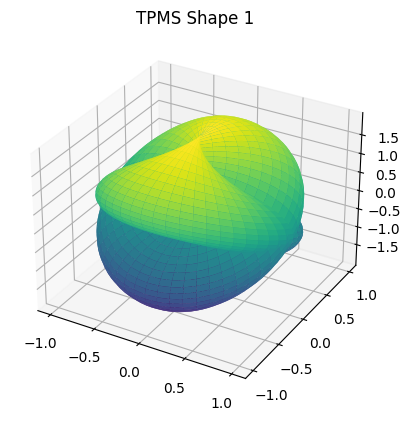

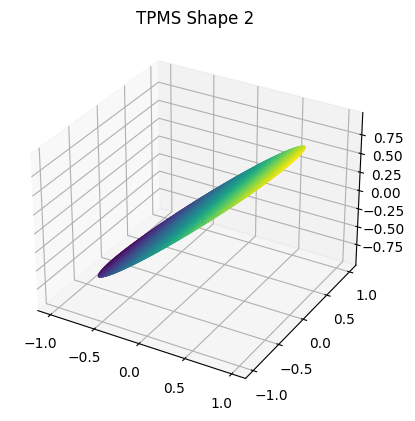

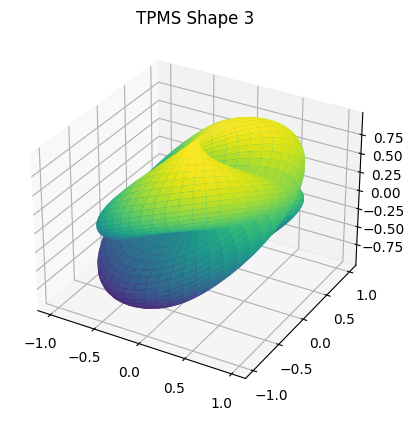

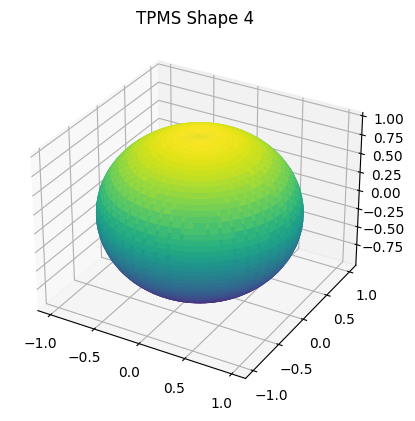

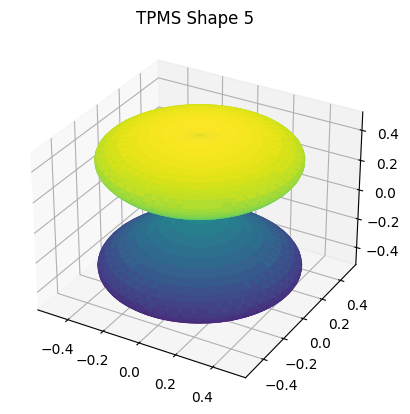

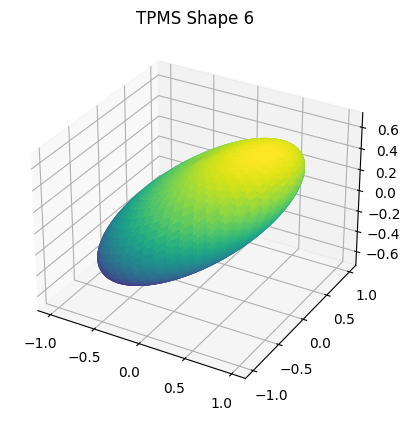

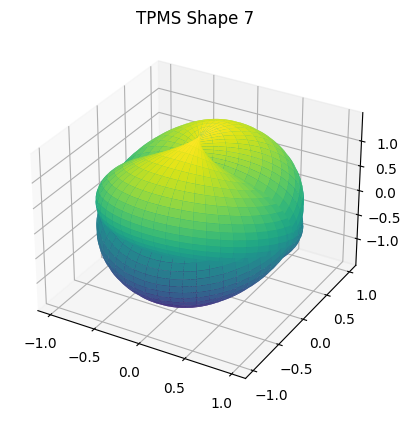

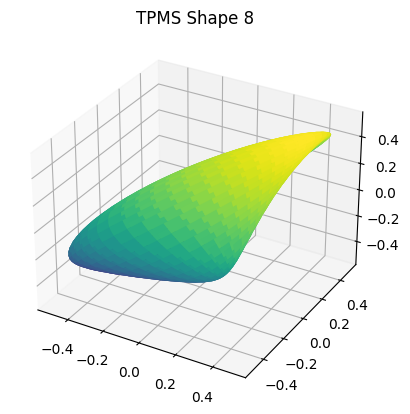

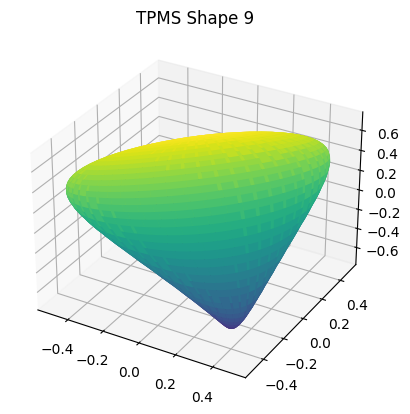

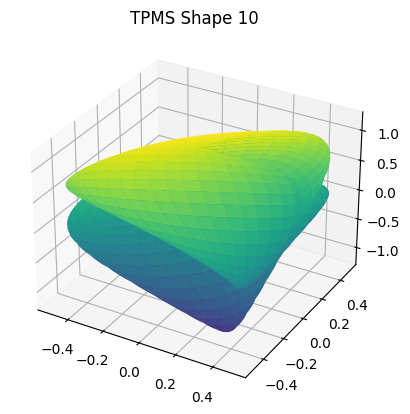

Generated Data:
          K    L         M  Porosity  Pore_Size  Pressure_Drop  \
0  0.000000  0.0  1.000000      0.46      0.024            1.5   
1  0.063424  0.0  0.997987      0.46      0.024            1.5   
2  0.126592  0.0  0.991955      0.46      0.024            1.5   
3  0.189251  0.0  0.981929      0.46      0.024            1.5   
4  0.251148  0.0  0.967949      0.46      0.024            1.5   

   Heat_Transfer_Coefficient  Energy_Dissipation  
0                       0.77                0.92  
1                       0.77                0.92  
2                       0.77                0.92  
3                       0.77                0.92  
4                       0.77                0.92  
Column Names: Index(['K', 'L', 'M', 'Porosity', 'Pore_Size', 'Pressure_Drop',
       'Heat_Transfer_Coefficient', 'Energy_Dissipation'],
      dtype='object')


In [115]:
#to predict the TPMS Shapes: input values as {Porosity', 'Pore_Size', 'Pressure_Drop','Heat_Transfer_Coefficient', 'Energy_Dissipation'}
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function to generate Gyroid TPMS structure
def gyroid(u, v):
    x = np.sin(u) * np.cos(v)
    y = np.sin(u) * np.sin(v)
    z = np.cos(u) + np.sin(v)
    return x, y, z

# Function to generate Diamond TPMS structure
def diamond(u, v):
    x = np.sin(u) * np.cos(v)
    y = np.sin(u) * np.sin(v)
    z = np.sin(u) * np.cos(v)
    return x, y, z

# Function to generate Primitive TPMS structure
def primitive(u, v):
    x = np.sin(u) * np.cos(v)
    y = np.sin(u) * np.sin(v)
    z = np.cos(u)
    return x, y, z

# Function to generate Schwarz P TPMS structure
def schwarz_p(u, v):
    x = 0.5 * np.sin(2 * u) * np.sin(v)
    y = 0.5 * np.sin(2 * u) * np.cos(v)
    z = 0.5 * np.cos(u)
    return x, y, z

# Function to generate hybrid TPMS structure
def hybrid(u, v, func1, func2):
    x1, y1, z1 = func1(u, v)
    x2, y2, z2 = func2(u, v)
    x = 0.5 * (x1 + x2)
    y = 0.5 * (y1 + y2)
    z = 0.5 * (z1 + z2)
    return x, y, z

# Create a DataFrame to store shape and design property data
all_data = pd.DataFrame()

# List of TPMS functions
tpms_functions = [gyroid, diamond, lambda u, v: hybrid(u, v, gyroid, diamond),
                  primitive, schwarz_p, lambda u, v: hybrid(u, v, diamond, primitive),
                  lambda u, v: hybrid(u, v, gyroid, primitive), lambda u, v: hybrid(u, v, schwarz_p, diamond),
                  lambda u, v: hybrid(u, v, schwarz_p, primitive), lambda u, v: hybrid(u, v, schwarz_p, gyroid)]

# Generate shapes and attach random design properties
for i, tpms_func in enumerate(tpms_functions):
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, 2 * np.pi, 100)
    u, v = np.meshgrid(u, v)

    x, y, z = tpms_func(u, v)

    # Attach synthetic design properties
    design_properties = {
        'Porosity': np.round(np.random.uniform(0.35, 0.5), 2),
        'Pore_Size': np.round(np.random.uniform(0.015, 0.025), 3),
        'Pressure_Drop': np.round(np.random.uniform(1.0, 1.6), 1),
        'Heat_Transfer_Coefficient': np.round(np.random.uniform(0.75, 0.85), 2),
        'Energy_Dissipation': np.round(np.random.uniform(0.87, 0.95), 2)
    }

    # Save shape and design properties to the DataFrame
    shape_data = pd.DataFrame({'K': x.flatten(), 'L': y.flatten(), 'M': z.flatten(), **design_properties})
    all_data = pd.concat([all_data, shape_data], ignore_index=True)

    # Plot the generated shape
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_title(f'TPMS Shape {i+1}')
    ax.plot_surface(x, y, z, cmap='viridis')
    plt.show()

# Print the generated data
print("Generated Data:")
print(all_data.head())

# Drop rows with NaN values in the 'K', 'L', 'M' columns
all_data = all_data.dropna(subset=['K', 'L', 'M'])

# Print column names to check
print("Column Names:", all_data.columns)


In [116]:
# Print column names to check
print("Column Names:", all_data.columns)


Column Names: Index(['K', 'L', 'M', 'Porosity', 'Pore_Size', 'Pressure_Drop',
       'Heat_Transfer_Coefficient', 'Energy_Dissipation'],
      dtype='object')


In [128]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten

# Use 'Porosity', 'Pore_Size', 'Pressure_Drop', 'Heat_Transfer_Coefficient', 'Energy_Dissipation' as input features
X = all_data[['Porosity', 'Pore_Size', 'Pressure_Drop', 'Heat_Transfer_Coefficient', 'Energy_Dissipation']].values

# Use 'K', 'L', 'M' as target variables
y = all_data[['K', 'L', 'M']].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the scaler for input features on the training data
scaler_input = StandardScaler()
scaler_input.fit(X_train)

# Standardize the input features for training and testing sets
X_train_scaled = scaler_input.transform(X_train)
X_test_scaled = scaler_input.transform(X_test)

# Create and fit the scaler for output features on the training data
scaler_output = StandardScaler()
scaler_output.fit(y_train)

# Standardize the output features for training and testing sets
y_train_scaled = scaler_output.transform(y_train)
y_test_scaled = scaler_output.transform(y_test)


# Build a simple CNN model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(5,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='linear'))  # Output layer with 3 neurons for 'K', 'L', 'M'

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_scaled, y_train_scaled, epochs=10, batch_size=2, validation_data=(X_test_scaled, y_test_scaled))

# Evaluate the model on the testing set
mse = model.evaluate(X_test_scaled, y_test_scaled)
print(f'Mean Squared Error on Testing Set: {mse}')




Epoch 1/10
40000/40000 [==============================] - 106s 3ms/step - loss: 1.0013 - val_loss: 1.0031
Epoch 2/10
40000/40000 [==============================] - 104s 3ms/step - loss: 1.0004 - val_loss: 1.0028
Epoch 3/10
40000/40000 [==============================] - 106s 3ms/step - loss: 1.0004 - val_loss: 1.0033
Epoch 4/10
40000/40000 [==============================] - 103s 3ms/step - loss: 1.0003 - val_loss: 1.0028
Epoch 5/10
40000/40000 [==============================] - 108s 3ms/step - loss: 1.0004 - val_loss: 1.0035
Epoch 6/10
40000/40000 [==============================] - 120s 3ms/step - loss: 1.0004 - val_loss: 1.0034
Epoch 7/10
40000/40000 [==============================] - 120s 3ms/step - loss: 1.0004 - val_loss: 1.0023
Epoch 8/10
40000/40000 [==============================] - 112s 3ms/step - loss: 1.0003 - val_loss: 1.0042
Epoch 9/10
40000/40000 [==============================] - 115s 3ms/step - loss: 1.0004 - val_loss: 1.0031
Epoch 10/10
625/625 [=========================

625/625 [==============================] - 1s 1ms/step
Predicted Shape (K, L, M): [0.00330769 0.00265452 0.00597293 ... 0.00330769 0.00265452 0.00597293]


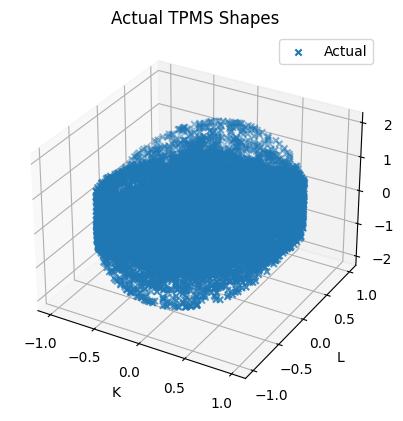

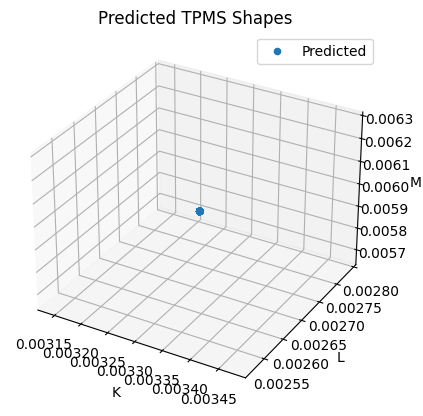

In [130]:
# Make predictions on the testing set
predictions_scaled = model.predict(X_test_scaled)

# Inverse transform the scaled predictions to get the original scale
predicted_klm = scaler_output.inverse_transform(predictions_scaled)

# ... (previous code)

# Plot the actual 'K', 'L', 'M' values
fig_actual = plt.figure()
ax_actual = fig_actual.add_subplot(111, projection='3d')
ax_actual.scatter(y_test[:, 0], y_test[:, 1], y_test[:, 2], label='Actual', marker='x')
ax_actual.set_title('Actual TPMS Shapes')
ax_actual.set_xlabel('K')
ax_actual.set_ylabel('L')
ax_actual.set_zlabel('M')
ax_actual.legend()

# Plot the predicted 'K', 'L', 'M' values
fig_predicted = plt.figure()
ax_predicted = fig_predicted.add_subplot(111, projection='3d')
ax_predicted.scatter(predicted_klm[:, 0], predicted_klm[:, 1], predicted_klm[:, 2], label='Predicted', marker='o')
ax_predicted.set_title('Predicted TPMS Shapes')
ax_predicted.set_xlabel('K')
ax_predicted.set_ylabel('L')
ax_predicted.set_zlabel('M')
ax_predicted.legend()
print("Predicted Shape (K, L, M):", predicted_klm.flatten())
# Show the plots
plt.show()


In [131]:
print("Predicted Shape (K, L, M):", predicted_shape.flatten())

Predicted Shape (K, L, M): [ 0.00659358  0.02991712 -0.00060436]


In [132]:
# Example input values for design properties
new_design_properties = {
    'Porosity': 0.07,
    'Pore_Size': 0.2,
    'Pressure_Drop': 4,
    'Heat_Transfer_Coefficient':0.8,
    'Energy_Dissipation':0.45
}
# Standardize the input features using the scaler trained on the original data
new_design_scaled = np.array([list(new_design_properties.values())])

# Make predictions for 'K', 'L', 'M' based on the new input
predicted_shape = model.predict(new_design_scaled)

print("Predicted Shape (K, L, M):", predicted_shape.flatten())


1/1 [==============================] - 0s 100ms/step
Predicted Shape (K, L, M): [ 0.00903224  0.00137087 -0.00367358]


625/625 [==============================] - 2s 3ms/step


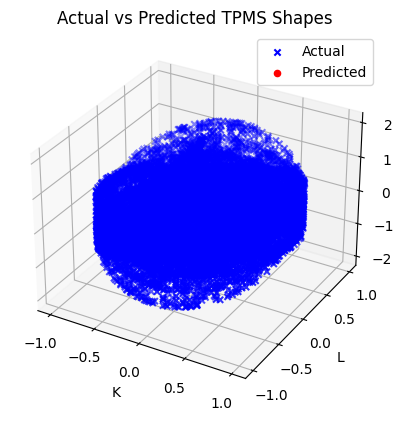

In [133]:
# Make predictions on the testing set
predictions_scaled = model.predict(X_test_scaled)

# Inverse transform the scaled predictions to get the original scale
predicted_klm = scaler_output.inverse_transform(predictions_scaled)

# Plot the actual and predicted 'K', 'L', 'M' values on a single figure
fig_combined = plt.figure()
ax_combined = fig_combined.add_subplot(111, projection='3d')

# Plot the actual 'K', 'L', 'M' values
ax_combined.scatter(y_test[:, 0], y_test[:, 1], y_test[:, 2], label='Actual', marker='x', color='blue')

# Plot the predicted 'K', 'L', 'M' values
ax_combined.scatter(predicted_klm[:, 0], predicted_klm[:, 1], predicted_klm[:, 2], label='Predicted', marker='o', color='red')

ax_combined.set_title('Actual vs Predicted TPMS Shapes')
ax_combined.set_xlabel('K')
ax_combined.set_ylabel('L')
ax_combined.set_zlabel('M')
ax_combined.legend()

# Show the plot
plt.show()
